In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [2]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

# import os 
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
lecture = BayesNet()
lecture.load_from_bifxml('testing/lecture_example2.BIFXML')

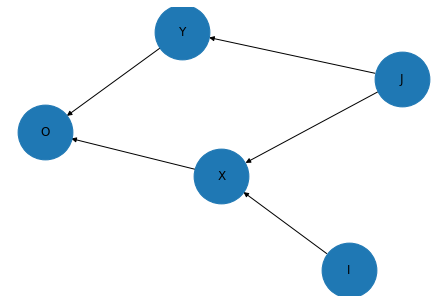

In [4]:
lecture.draw_structure()

In [5]:
lecture.get_all_variables()

['I', 'J', 'Y', 'X', 'O']

In [6]:
lecture.get_all_cpts()

{'I':        I    p
 0  False  0.5
 1   True  0.5, 'J':        J    p
 0  False  0.5
 1   True  0.5, 'Y':        J      Y     p
 0  False  False  0.01
 1  False   True  0.99
 2   True  False  0.99
 3   True   True  0.01, 'X':        J      I      X     p
 0  False  False  False  0.95
 1  False  False   True  0.05
 2  False   True  False  0.95
 3  False   True   True  0.05
 4   True  False  False  0.95
 5   True  False   True  0.05
 6   True   True  False  0.05
 7   True   True   True  0.95, 'O':        Y      X      O     p
 0  False  False  False  0.98
 1  False  False   True  0.02
 2  False   True  False  0.02
 3  False   True   True  0.98
 4   True  False  False  0.02
 5   True  False   True  0.98
 6   True   True  False  0.02
 7   True   True   True  0.98}

In [7]:
lecture.get_children('Rain?')

NetworkXError: The node Rain? is not in the digraph.

In [ ]:
lecture.get_all_edges()

## a) d-separation 

In [8]:
reasoner = BNReasoner(lecture)

In [ ]:
x = ['Rain?']
y = ['Sprinkler?']
z = ['Winter?', 'Wet Grass?']
reasoner.d_separation(x, y, z)

## b) Ordering

In [ ]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree()

In [ ]:
print('Minfull heuristic: ')

reasoner.ordering_minfull()

# c) network pruning

In [ ]:
q = ['Wet Grass?']
e = pd.Series({'Winter?': True, 'Rain?': False})

pruned = reasoner.net_prune(q, e)

In [ ]:
pruned.get_cpt('Wet Grass?')

## d) Marginal distributions

### summing-out: 

In [ ]:
factor = lecture.get_cpt('Rain?')
factor

In [ ]:
reasoner.sum_out(factor, ['Winter?'])

### multiplying

In [ ]:
rain = lecture.get_cpt('Rain?')
rain

In [ ]:
winter = lecture.get_cpt('Winter?')
winter

In [ ]:
rain = lecture.get_cpt('Rain?')
winter = lecture.get_cpt('Winter?')

reasoner.multiply(rain, winter)

In [ ]:
reasoner.multiply(winter, rain)

In [9]:
reasoner.MPE('mindegree', pd.Series({'J': True, 'O': False}))

['I', 'J', 'Y', 'X', 'O']
[       I    p
0  False  0.5
1   True  0.5,        I      X     p
4  False  False  0.95
5  False   True  0.05
6   True  False  0.05
7   True   True  0.95]
       I      X      p
0  False  False  0.475
1  False   True  0.025
2   True  False  0.025
3   True   True  0.475
       I      X      p
0  False  False  0.475
1  False   True  0.025
2   True  False  0.025
3   True   True  0.475
          I      p
X                 
False  True  0.475
True   True  0.475
       p      X      I
0  0.475  False  False
1  0.475   True   True
       p      X      I
0  0.475  False  False
1  0.475   True   True
[      J    p
1  True  0.5]
      J    p
1  True  0.5
J    True
p     0.5
dtype: object
[       Y     p
2  False  0.99
3   True  0.01,        Y      X      O     p
0  False  False  False  0.98
2  False   True  False  0.02
4   True  False  False  0.02
6   True   True  False  0.02]
       Y      X      O       p
0  False  False  False  0.9702
1  False   True  False  0.0198
2

,J,I,Y,X,O,p
0,True,False,False,False,False,0.230422
